<a href="https://colab.research.google.com/github/Fridrix19/BOT-Stable-Diffusion/blob/main/Bot_tg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Stable Diffusion + Telegram bot `

#Что такое Stable Diffusion?
___
Stable Diffusion - это модель преобразования текста в изображение, которая позволит миллионам людей создавать потрясающие произведения искусства за считанные секунды. Это прорыв в скорости и качестве. Совсем скоро она сможет работать на любых графических процессорах.
___
# Как запустить своего бота?
___
1. Войдите в Colab через ваш Google account.

2. В верхнем левом углу нажмите на вкладку "Файл"-> "Сохранить копию на диске". Это нужно для того, чтоб вы смогли редактировать код и вставлять токен своего бота.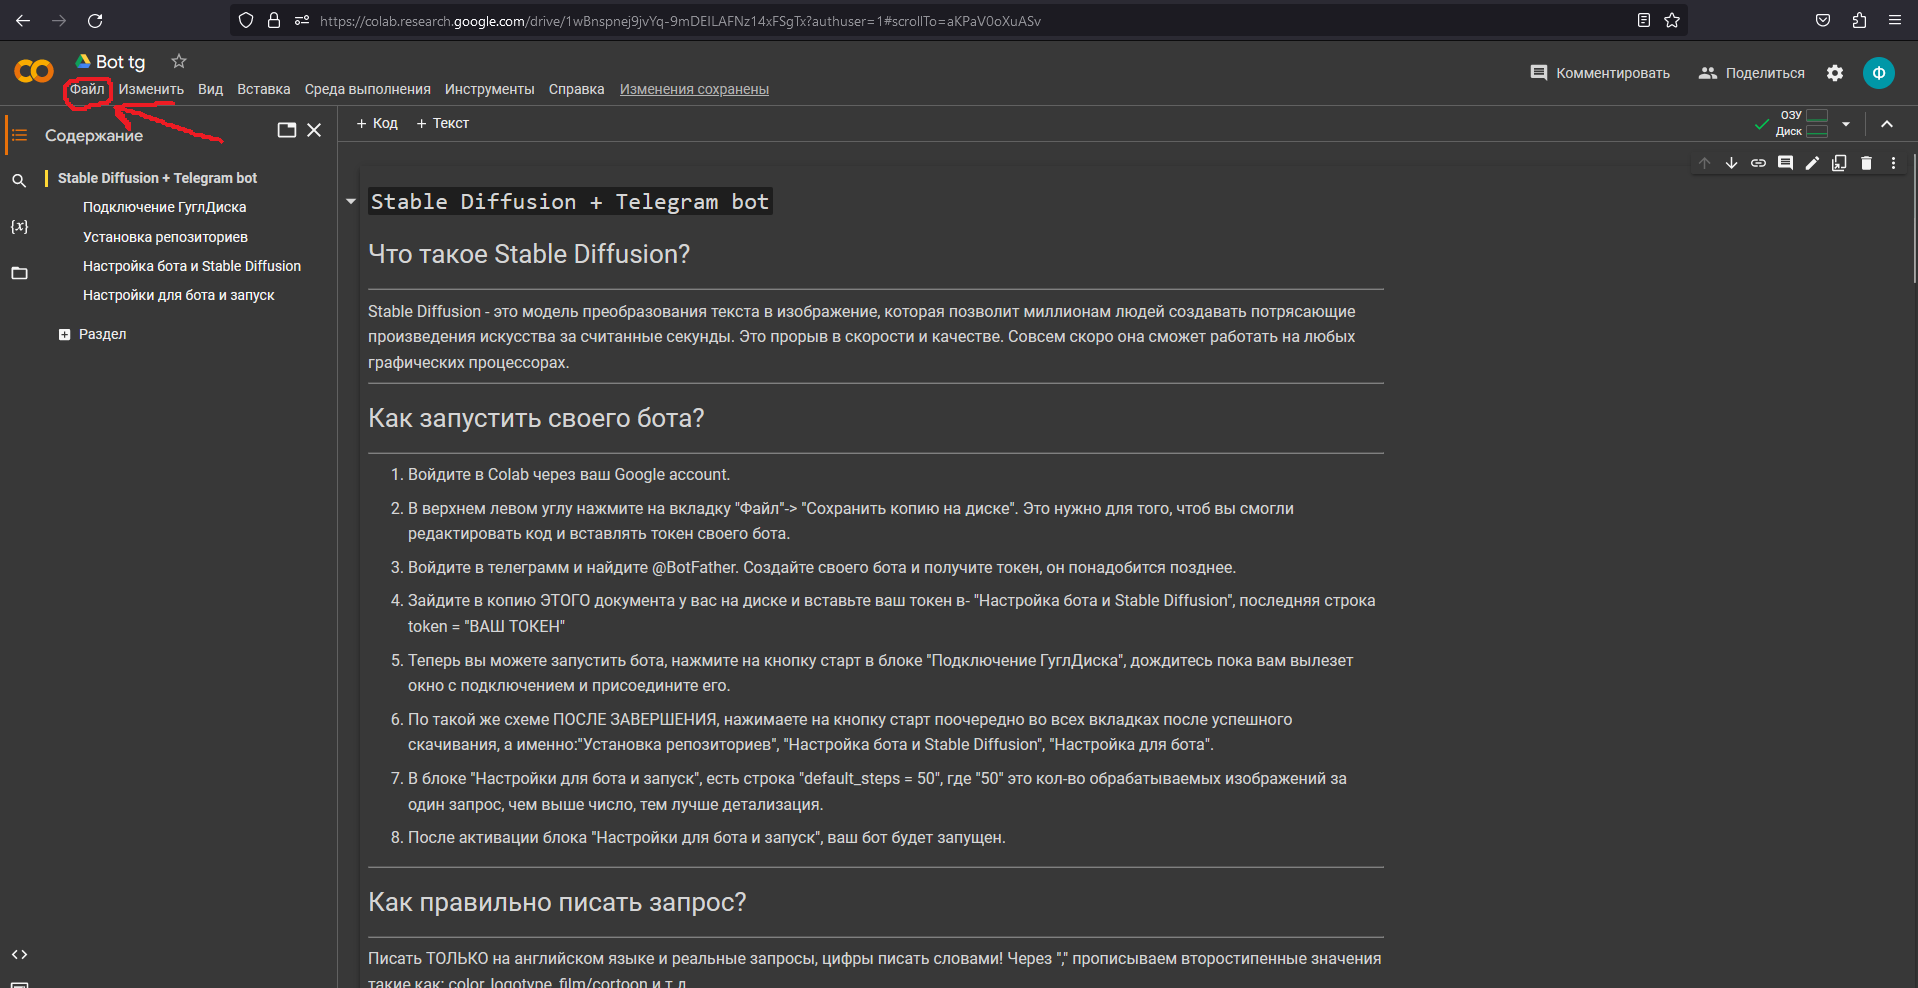
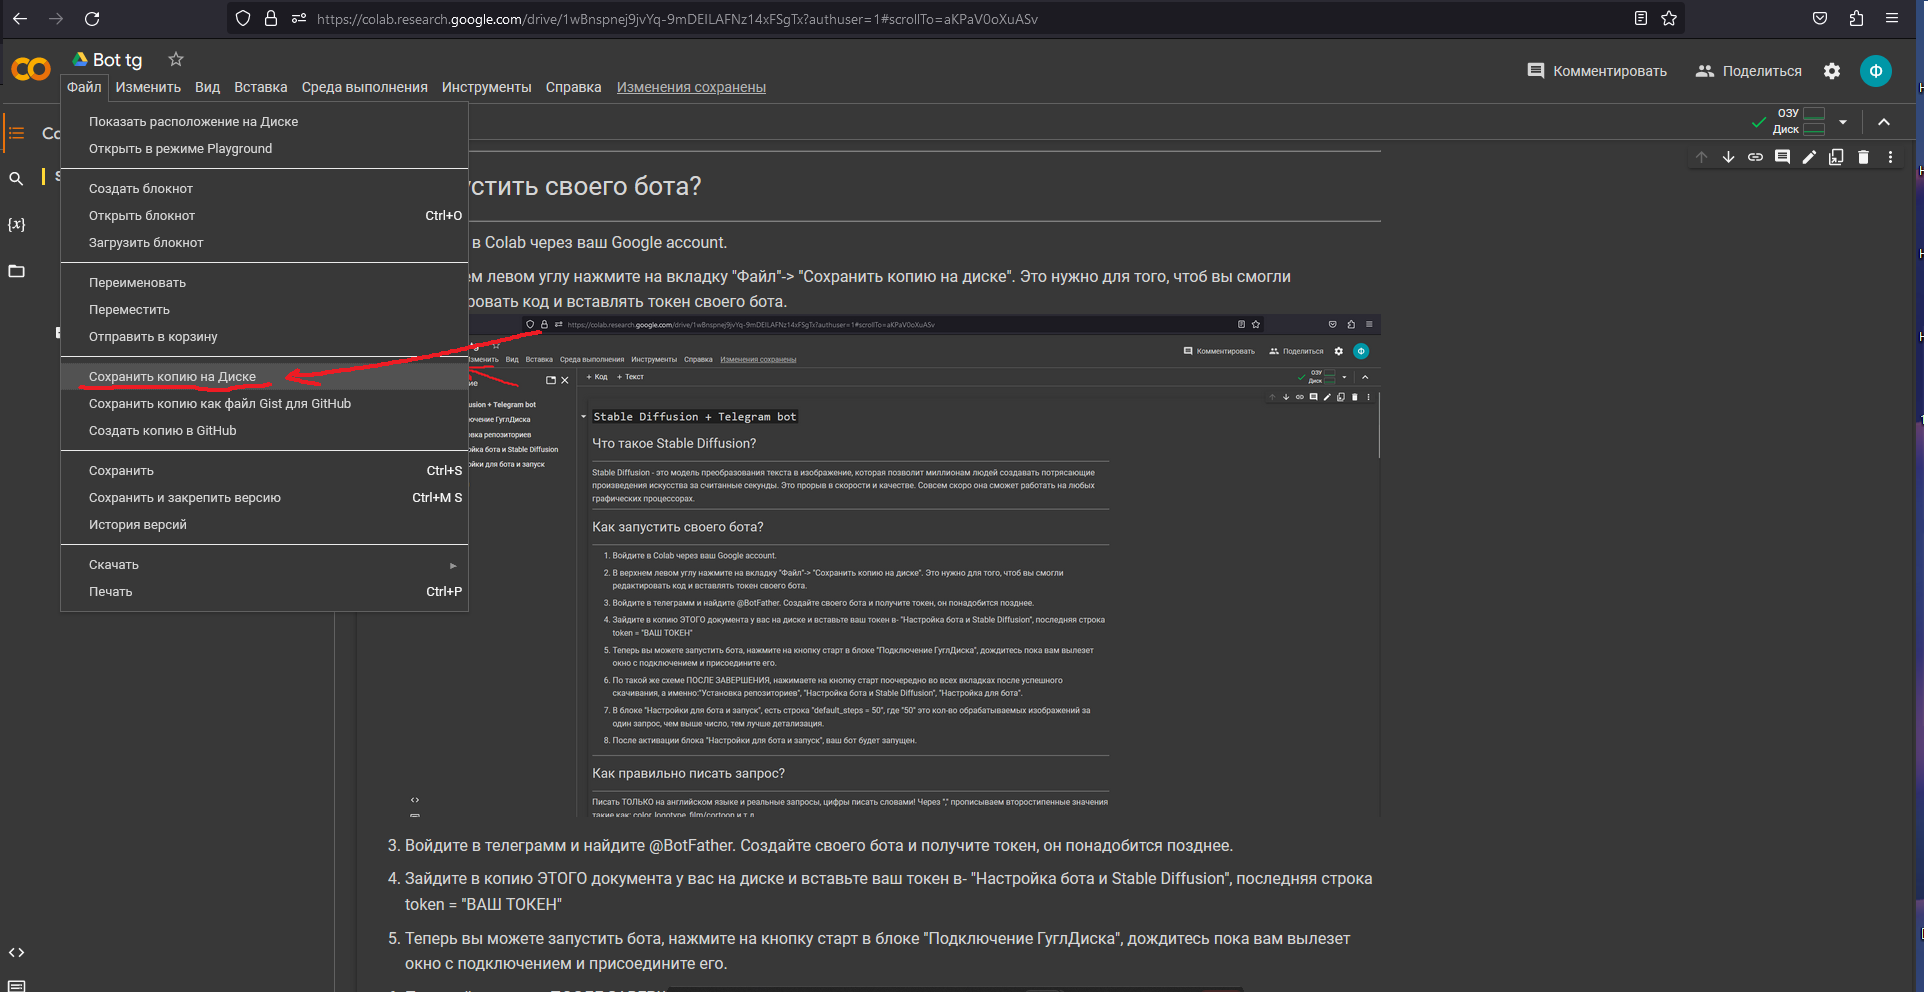

3. Войдите в телеграмм и найдите @BotFather. Создайте своего бота и получите токен, он понадобится позднее.
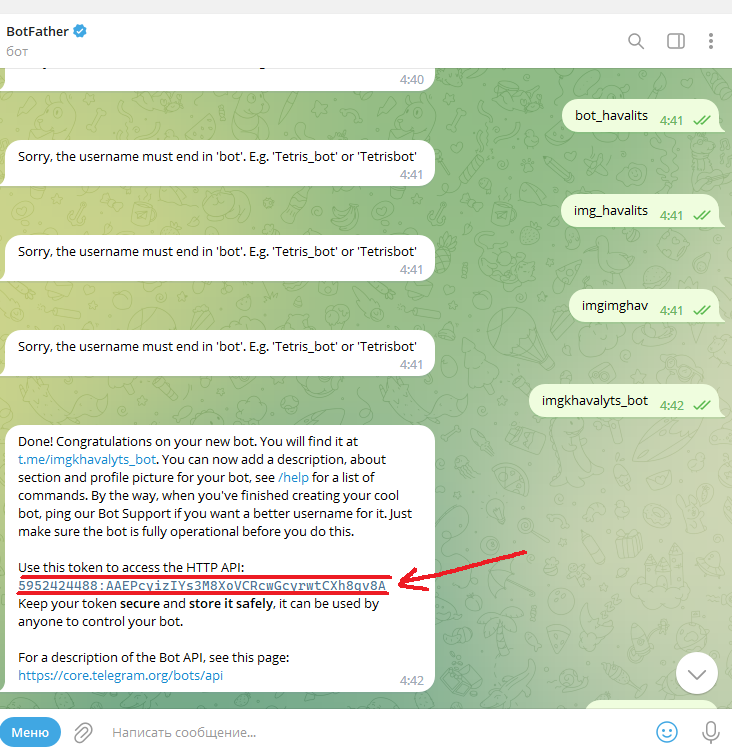

4. Зайдите в копию ЭТОГО документа у вас на диске и вставьте ваш токен в- "Настройка бота и Stable Diffusion", последняя строка token = "ВАШ ТОКЕН"
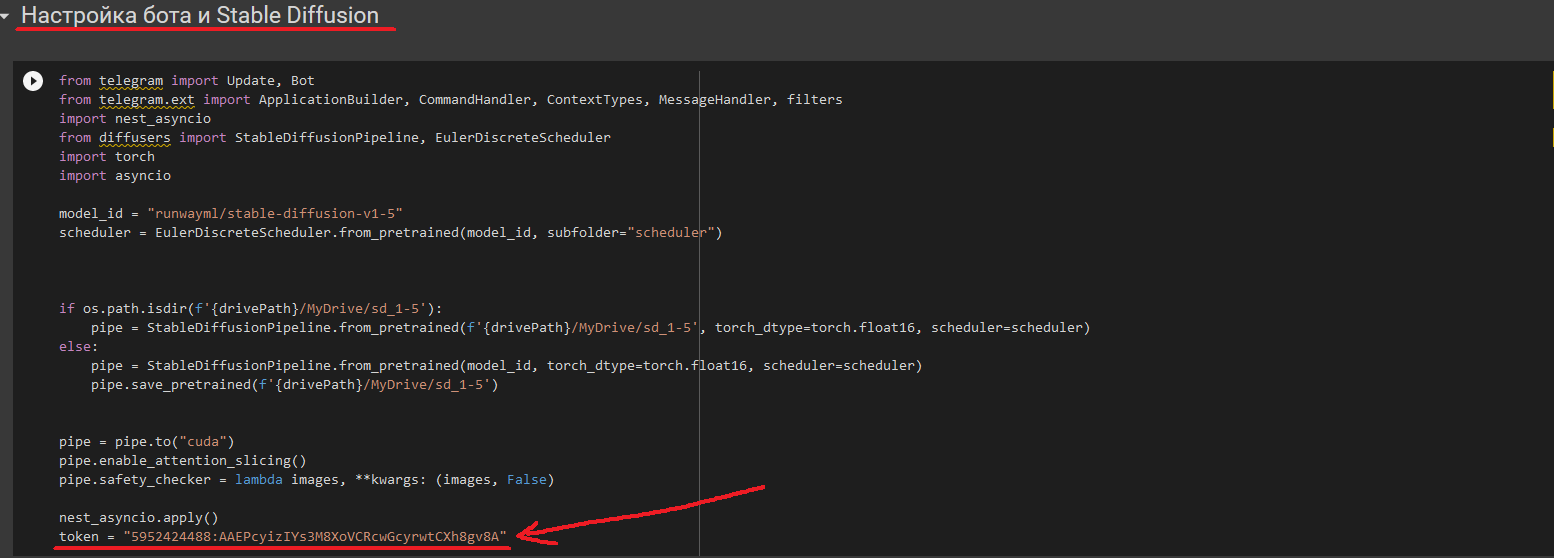

5. Теперь вы можете запустить бота, нажмите на кнопку старт в блоке "Подключение ГуглДиска", дождитесь пока вам вылезет окно с  подключением и присоедините его.
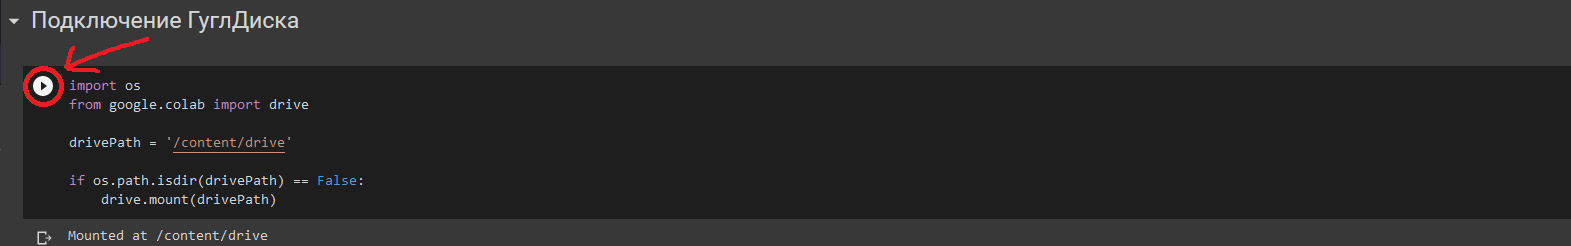
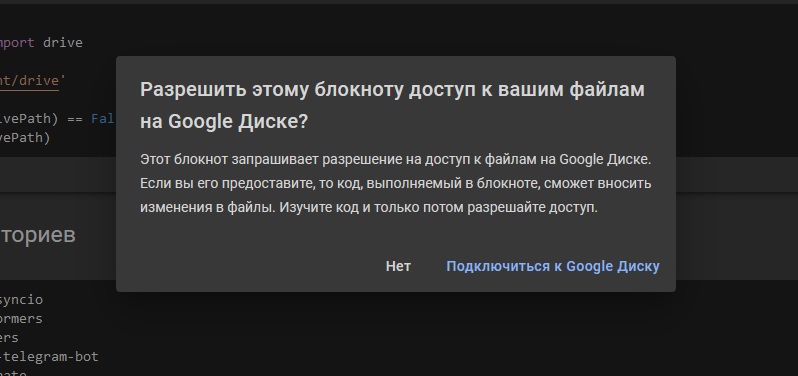

6. По такой же схеме ПОСЛЕ ЗАВЕРШЕНИЯ, нажимаете на кнопку старт поочередно во всех вкладках после успешного скачивания, а именно:"Установка репозиториев", "Настройка бота и Stable Diffusion", "Настройка для бота".

7. В блоке "Настройки для бота и запуск", есть строка "default_steps = 50", где "50" это кол-во обрабатываемых изображений за один запрос, чем выше число, тем лучше детализация.

8. После активации блока "Настройки для бота и запуск", ваш бот будет запущен.
___
`БОТ МОЖЕТ РАБОТАТЬ ТОЛЬКО 2,5 ЧАСА В ДЕНЬ ИЗ-ЗА ОРГАНИЧЕНИЯ ХОСТИНГА COLAB, ДЛЯ БЕСПЕРЕБОЙНОЙ РАБОТЫ КУПИТЕ ПОДПИСКУ "COLAB PREMIUM" ИЛИ ПЕРЕНЕСИТЕ КОД НА PHYTON ЕСЛИ У ВАС ВИДЕОКАРТА С ОБЪЕМОМ НЕ МЕНЕЕ 12ГБ ВИДЕОПАМЯТИ!`

___
#Как правильно писать запрос?
___
##### Писать ТОЛЬКО на английском языке и реальные запросы, цифры писать словами! Через "," прописываем второстипенные значения такие как: color, logotype, film/cortoon и т.д.
#####-Правильный запрос: smiling monkey, color red, HD, logotype.
#####-Неправильный запрос: monkey smile logotype red hd.
___
#Другие настройки Stable Diffusion
___
Чтоб бот корректно отобразил твой запрос напиши детали которые ты хочешь видеть:саму сцену или персонажа, качество изображения, действо где это происходит и прочее.  И детали которые бы тебе видеть не хотелось отделяй через двойное нижнее подчёркивание "__"  по такой схеме:
#####"Batman fights Spider-Man in the night, HD, comics
#####__
#####House, text, watermark"
___
######Хавалиц Фёдор Витальевич 1-МД-25.
[Github](https://github.com/Fridrix19)
___

## Подключение ГуглДиска

In [1]:
import os
from google.colab import drive

drivePath = '/content/drive'

if os.path.isdir(drivePath) == False:
    drive.mount(drivePath)

MessageError: ignored

## Установка репозиториев

In [ ]:
%pip install nest-asyncio
%pip install transformers
%pip install diffusers
%pip install python-telegram-bot
%pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 24.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 2.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.8/535.8 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Настройка бота и Stable Diffusion

In [ ]:
from telegram import Update, Bot
from telegram.ext import ApplicationBuilder, CommandHandler, ContextTypes, MessageHandler, filters
import nest_asyncio
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch
import asyncio

model_id = "runwayml/stable-diffusion-v1-5"
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")



if os.path.isdir(f'{drivePath}/MyDrive/sd_1-5'):
    pipe = StableDiffusionPipeline.from_pretrained(f'{drivePath}/MyDrive/sd_1-5', torch_dtype=torch.float16, scheduler=scheduler)
else:
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, scheduler=scheduler)
    pipe.save_pretrained(f'{drivePath}/MyDrive/sd_1-5')


pipe = pipe.to("cuda")
pipe.enable_attention_slicing() 
pipe.safety_checker = lambda images, **kwargs: (images, False) 

nest_asyncio.apply()
token = "5952424488:AAEPcyizIYs3M8XoVCRcwGcyrwtCXh8gv8A"

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


## Настройки для бота и запуск

In [ ]:
default_steps = 50 

async def generate(update: Update, context: ContextTypes.DEFAULT_TYPE) -> None:
  text = update.message.text
  prompt = ''
  neg = ''
  if '__' in text:
    prompt = text.split("__")[0]
    neg = text.split("__")[1]
  else:
    prompt = text
  
  image = pipe(prompt, negative_prompt=neg, num_inference_steps=default_steps).images[0]
  image.save("./image.png")
  await update.message.reply_photo(photo="./image.png")

app = ApplicationBuilder().token(token).build()

app.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, generate))

app.run_polling()

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 23>:23                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/telegram/ext/_application.py:725 in run_polling           │
│                                                                                                  │
│    722 │   │   def error_callback(exc: TelegramError) -> None:                                   │
│    723 │   │   │   self.create_task(self.process_error(error=exc, update=None))                  │
│    724 │   │                                                                                     │
│ ❱  725 │   │   return self.__run(                                                                │
│    726 │   │   │   updater_coroutine=self.updater.start_polling(                                 │
│    727 │   │   │   │   poll_interval=poll_interval,                                              │
│    728 │   │   │   │   timeout=timeout,                                                          │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/telegram/ext/_application.py:935 in __run                 │
│                                                                                                  │
│    932 │   │   │   │   │   loop.run_until_complete(self.post_shutdown(self))                     │
│    933 │   │   │   finally:                                                                      │
│    934 │   │   │   │   if close_loop:                                                            │
│ ❱  935 │   │   │   │   │   loop.close()                                                          │
│    936 │                                                                                         │
│    937 │   def create_task(                                                                      │
│    938 │   │   self,                                                                             │
│                                                                                                  │
│ /usr/lib/python3.9/asyncio/unix_events.py:58 in close                                            │
│                                                                                                  │
│     55 │   │   self._signal_handlers = {}                                                        │
│     56 │                                                                                         │
│     57 │   def close(self):                                                                      │
│ ❱   58 │   │   super().close()                                                                   │
│     59 │   │   if not sys.is_finalizing():                                                       │
│     60 │   │   │   for sig in list(self._signal_handlers):                                       │
│     61 │   │   │   │   self.remove_signal_handler(sig)                                           │
│                                                                                                  │
│ /usr/lib/python3.9/asyncio/selector_events.py:84 in close                                        │
│                                                                                                  │
│     81 │                                                                                         │
│     82 │   def close(self):                                                                      │
│     83 │   │   if self.is_running():                                                             │
│ ❱   84 │   │   │   raise RuntimeError("Cannot close a running event loop")                       │
│     85 │   │   if self.is_closed():                        